# 电信客户流失分析

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import sys
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


filename = './telco.xls'
data =  pd.read_excel(filename)
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,internet,callid,callwait,forward,confer,ebill,loglong,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,1,0,0,1.31,4.16,1,1
1,3,11,33,1,7,136,5,5,0,0,...,0,1,1,1,1,0,1.48,4.91,4,1
2,3,68,52,1,24,116,1,29,0,1,...,0,1,1,0,1,0,2.90,4.75,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,2.25,3.50,1,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,0,1,1,0,1.84,3.40,3,0


# LogisticRegression 逻辑回归

In [13]:
x = data.iloc[:,:37].as_matrix()

x


array([[ 2.  , 13.  , 44.  , ...,  1.31,  4.16,  1.  ],
       [ 3.  , 11.  , 33.  , ...,  1.48,  4.91,  4.  ],
       [ 3.  , 68.  , 52.  , ...,  2.9 ,  4.75,  3.  ],
       ...,
       [ 3.  , 67.  , 59.  , ...,  3.29,  6.85,  4.  ],
       [ 3.  , 70.  , 49.  , ...,  3.24,  4.47,  3.  ],
       [ 3.  , 50.  , 36.  , ...,  2.58,  3.66,  2.  ]])

In [14]:
y = data.iloc[:,37].as_matrix()
y

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [2]:
x = data.iloc[:,:37].as_matrix()
y = data.iloc[:,37].as_matrix()

from sklearn.linear_model import LogisticRegression as LR
lr = LR() #建立逻辑回归模型
lr.fit(x, y) #用筛选后的特征数据来训练模型
print(u'逻辑回归模型训练结束。')
print(u'模型的平均正确率为：%s' % lr.score(x, y)) #给出模型的平均正确率，本例为77.8%

逻辑回归模型训练结束。
模型的平均正确率为：0.781


# 决策树分析

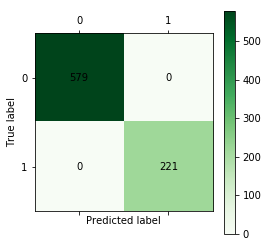

In [5]:
def cm_plot(y, yp):
  
  from sklearn.metrics import confusion_matrix #导入混淆矩阵函数

  cm = confusion_matrix(y, yp) #混淆矩阵
  
  import matplotlib.pyplot as plt #导入作图库
  plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
  plt.colorbar() #颜色标签
  
  for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
  
  plt.ylabel('True label') #坐标轴标签
  plt.xlabel('Predicted label') #坐标轴标签
  return plt

from sklearn.cross_validation import train_test_split
p = 0.2 #设置测试数据比例
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = p)

from sklearn.tree import DecisionTreeClassifier #导入决策树模型

treefile = './tree.pkl' #模型输出名字
tree = DecisionTreeClassifier() #建立决策树模型
tree.fit(x_train, y_train) #训练

#保存模型
from sklearn.externals import joblib
joblib.dump(tree, treefile)

cm_plot(y_train, tree.predict(x_train)).show()#显示混淆矩阵可视化结果
#注意到Scikit-Learn使用predict方法直接给出预测结果。

# ROC曲线

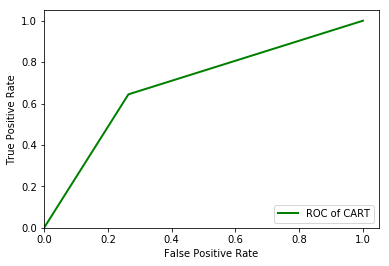

In [4]:
from sklearn.metrics import roc_curve #导入ROC曲线函数

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(x_test)[:,1], pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果

# KNN分类器

In [11]:
#训练KNN分类器 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
clf = KNeighborsClassifier(algorithm='kd_tree')
clf.fit(x_train, y_train)

#测试结果
answer = clf.predict(x_test)
print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n", np.mean( answer == y_test),"\n")

#准确率
precision, recall, thresholds = precision_recall_curve(y_train, clf.predict(x_train))
print("classification_report: \n")
print(classification_report(y_test, answer, target_names = ['高', '低']))

x_test: 
 [[ 2.    6.   30.   ...  0.3   3.81  1.  ]
 [ 3.   57.   60.   ...  2.78  2.64  3.  ]
 [ 1.   22.   41.   ...  2.55  3.37  1.  ]
 ...
 [ 1.   35.   34.   ...  2.63  4.36  1.  ]
 [ 3.   24.   39.   ...  2.01  3.89  1.  ]
 [ 1.   10.   23.   ...  2.15  3.58  3.  ]] 

answer: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0] 

y_test: 
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1

# 贝叶斯分类器

In [10]:
####贝叶斯分类器####
#训练贝叶斯分类器
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB() 
clf.fit(x_train,y_train)


#测试结果
print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n", np.mean( answer == y_test),"\n")
print("classification_report: \n")
print(classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 2.    6.   30.   ...  0.3   3.81  1.  ]
 [ 3.   57.   60.   ...  2.78  2.64  3.  ]
 [ 1.   22.   41.   ...  2.55  3.37  1.  ]
 ...
 [ 1.   35.   34.   ...  2.63  4.36  1.  ]
 [ 3.   24.   39.   ...  2.01  3.89  1.  ]
 [ 1.   10.   23.   ...  2.15  3.58  3.  ]] 

answer: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0] 

y_test: 
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1

In [12]:
# SVM支持向量机
from sklearn.svm import SVC
clf =SVC()
clf.fit(x_train, y_train)  

#测试结果
print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n", np.mean( answer == y_test),"\n")
print("classification_report: \n")
print(classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 2.    6.   30.   ...  0.3   3.81  1.  ]
 [ 3.   57.   60.   ...  2.78  2.64  3.  ]
 [ 1.   22.   41.   ...  2.55  3.37  1.  ]
 ...
 [ 1.   35.   34.   ...  2.63  4.36  1.  ]
 [ 3.   24.   39.   ...  2.01  3.89  1.  ]
 [ 1.   10.   23.   ...  2.15  3.58  3.  ]] 

answer: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0] 

y_test: 
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1